In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

%matplotlib inline

This example uses matplotlib 2.0

In [2]:
#%matplotlib widget
import sys
print("Python version is {} \n".format(sys.version))
print("Matplotlib version is {} \n".format(mpl.__version__))
print("Matplotlibrc file is {}\n".format(mpl.matplotlib_fname()))

Python version is 3.10.5 | packaged by conda-forge | (main, Jun 14 2022, 07:04:59) [GCC 10.3.0] 

Matplotlib version is 3.5.2 

Matplotlibrc file is matplotlibrc



and the matplotlibrc file from 
https://github.com/mpmdean/matplotlibrc
please suggest improvements

## A few notes

* All fields are using latex by default -- this avoid non-uniformity when using latex in some labels. 

* Using a uniform style is very important for an attractive manuscript. Try to avoid ad-hoc changes to the settings. 

* If you feel that there is a desirable change, consider applying it to the whole manuscript, preferably by setting some edits to the rc file right at the start of the script/notebook. e.g. mpl.rc('font', size=10). 

## Create figure

* The width of a figure should always be set to the real physical column width. e.g. 3+3/8 inches for a PRL column. This will mean that fonts appear on the page in the correct size.

* Gridspec and subplots_adjust are useful to set the precise location of panels.

* Including 2-4 minor ticks per major tick is usually good.

* Putting the colorbar on separate axes facilities better control over its location. 

* Saving in pdf creates vector graphics and fast performance within pdflatex.

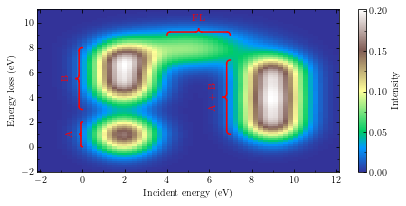

In [3]:
X, Y = np.meshgrid(np.linspace(-2, 12, 60),
                   np.linspace(-2, 11, 80))

s2pi = np.sqrt(2*np.pi)
tiny = 1.0e-15

def gaussian(x, amplitude=1.0, center=0.0, sigma=1.0):
    return ((amplitude/(max(tiny, s2pi*sigma)))
            * np.exp(-(1.0*x-center)**2 / max(tiny, (2*sigma**2))))

def gaussian2d(x, y, amplitude=1.0, centerx=0.0, centery=0.0, sigmax=1.0,
               sigmay=1.0):
    z = amplitude*(gaussian(x, amplitude=1, center=centerx, sigma=sigmax) *
                   gaussian(y, amplitude=1, center=centery, sigma=sigmay))
    return z

Z = (gaussian2d(X, Y, centerx=2.0, centery=1.0)
     + gaussian2d(X, Y, centerx=2.0, centery=5.0)
     + gaussian2d(X, Y, centerx=2.0, centery=7.0)
     
     + gaussian2d(X, Y, centerx=9.0, centery=2.0)
     + gaussian2d(X, Y, centerx=9.0, centery=4.0)
     + gaussian2d(X, Y, centerx=9.0, centery=6.0)
     + gaussian2d(X, Y, centerx=5.0, centery=8.0, sigmax=2)
    )

fig, ax = plt.subplots(figsize=(6+3/4, 3))

art = ax.pcolor(X, Y, Z, shading='auto', cmap='terrain', vmin=0,
               alpha=1, linewidth=0, rasterized=True)
cb = plt.colorbar(art, ax=ax)

ax.set_xlabel('Incident energy (eV)')
ax.set_ylabel('Energy loss (eV)')
cb.set_label('Intensity')

ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
cb.set_ticks(ticker.MultipleLocator(0.05))
cb.ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))

from curlyBrace import curlyBrace
fontdict = dict(color='red')

p1 = [0, 0.0]
p2 = [0, 2]
_ = curlyBrace(fig, ax, p1, p2, 0.05, str_text='A',
               color='r', fontdict=fontdict)

p1 = [0, 3]
p2 = [0, 8]
_ = curlyBrace(fig, ax, p1, p2, 0.05, str_text='B',
               color='r', fontdict=fontdict)

p1 = [7, 1]
p2 = [7, 7]
_ = curlyBrace(fig, ax, p1, p2, 0.05, str_text='A + B',
               color='r', fontdict=fontdict)

p1 = [4, 9]
p2 = [7, 9]
_ = curlyBrace(fig, ax, p1, p2, 0.05, str_text='FL',
               color='r', fontdict=fontdict)

fig.savefig('ex_20_braces.pdf', dpi=1200)